In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import MNIST dataset

In [35]:
from tensorflow.keras.datasets import mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [36]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)


## Checking a single image

In [37]:
single = X_train[0]
single.shape

(28, 28)

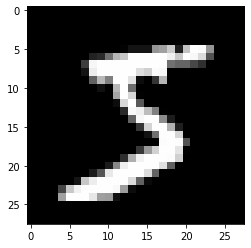

In [38]:
plt.imshow(single, cmap='Greys_r')

## one-hot encoding y labels

In [39]:
y_train.shape

(60000,)

In [40]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

## Scaling train and test sets

In [41]:
X_train = X_train/255
X_test = X_test / 255

## Checking the image again

In [42]:
scaled_image = X_train[0]

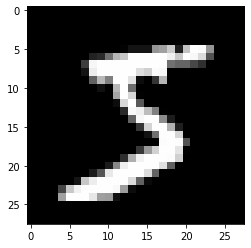

In [43]:
plt.imshow(scaled_image, cmap='Greys_r')

## Reshaping the train and test sets

**The input shape needs to be (images,width,height,channels)**

In [45]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [46]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [47]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Steps for image preprocessing

1. import dataset
2. one-hot encode y-labels
3. scale the images
4. reshape train test sets

## Import model and Layers

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

## Create model

In [53]:
model = Sequential()

# the larger the size and complexity of images the more filters you will use
# filters are choosen in the powers of 2
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1, 1),
                input_shape=(28,28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

#output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Early Stopping**

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=1, verbose=1)

**Fitting the model**

In [55]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), 
          callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 31s 13ms/step - loss: 0.1361 - accuracy: 0.9593 - val_loss: 0.0668 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0410 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.0398 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0363 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0434 - val_accuracy: 0.9876
Epoch 5: early stopping


## Evaluating model

In [56]:
metrics = pd.DataFrame(model.history.history)

In [57]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136113,0.959350,0.066845,0.9797
1,0.047271,0.985450,0.040958,0.9854
2,0.031436,0.990617,0.039771,0.9878
3,0.020889,0.993717,0.036276,0.9889
4,0.015840,0.994700,0.043423,0.9876


**Line plot of loss and validation loss**

<AxesSubplot:>

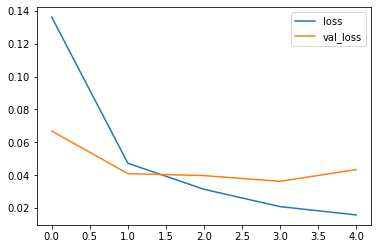

In [58]:
metrics[['loss', 'val_loss']].plot()

**Line plot of accuracy and validation accuracy**

<AxesSubplot:>

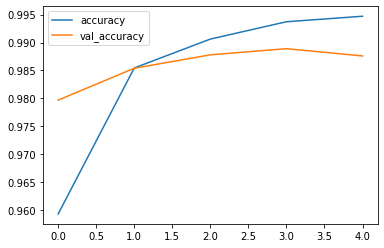

In [60]:
metrics[['accuracy', 'val_accuracy']].plot()

## Predictions

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [67]:
predictions = np.round(predictions)
pred_classes = np.argmax(predictions, axis=1)

### Confusion matrix

In [86]:
print(confusion_matrix(y_test, pred_classes))

[[ 974    1    0    0    0    0    2    1    2    0]
 [   0 1132    0    0    0    0    2    0    1    0]
 [   3    0 1007    3    1    0    3   10    5    0]
 [   2    0    1 1005    0    0    0    0    2    0]
 [   1    0    0    0  972    0    5    0    0    4]
 [   2    0    0   12    0  873    4    0    1    0]
 [   5    2    0    0    1    2  947    0    1    0]
 [   2    0    3    2    0    0    0 1020    1    0]
 [   4    0    1    1    0    1    1    0  966    0]
 [  12    1    0    6    5    2    0    7    4  972]]


**Plot confusion matrix**

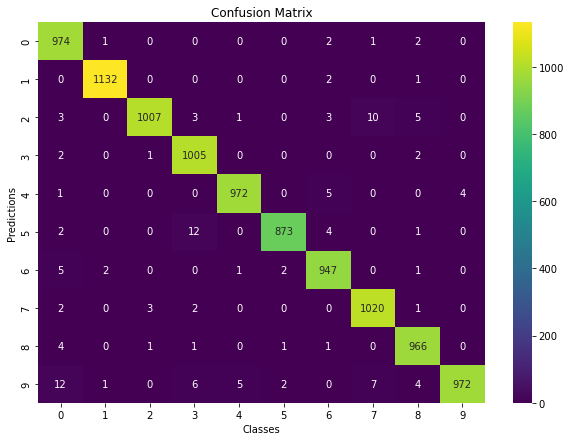

In [150]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, pred_classes), xticklabels=np.arange(0,10), yticklabels=np.arange(0,10),
            cmap='viridis', annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Classes')
plt.ylabel('Predictions')
plt.show()

### Classification Report

In [91]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Getting predictions

In [151]:
import random
r = random.randint(0, len(X_test))
some_image = X_test[r]

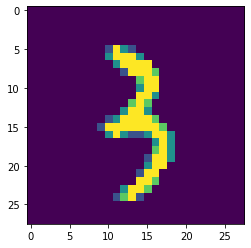

In [152]:
plt.imshow(some_image)

In [153]:
np.argmax(model.predict(some_image.reshape(1,28,28,1)), axis=1)

1/1 [==============================] - 0s 18ms/step


array([3], dtype=int64)

# Done